## The Hungarian Algorithm 

The Hungarian algorithm is a method used solve the linear sum assignment problem by minimizing a cost matrix of size n x n. This jupyter notebook will attempt to document the implementation of the Hungarian algorithm as it pertains to matching, or registering, 3D points from one matrix to 3D points in another matrix with the hopes of eventually applying the algorithm to real data sets in order to register individual synapses within an image across time. 

In [1]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
init_notebook_mode(connected = True)

## Hungarian Algorithm Implementation for Matrices of the Same Size - 3D Points

**Step 1:** To begin, create any n x 3 matrix. The matrix is of size n x 3 because this Jupyter notebook will document the registration of 3D points in two separate matrices. Below, I have created an n x 3 matrix, E. 

In [53]:
E = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1]])
print(E)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


**Step 2:** Now, create another n x 3 matrix that is a permutation of E. In the case below, I have created F, an n x 3 matrix where the rows of E have been shuffled around. 

In [54]:
F = np.array([[2, 0, 1], [2, 5, 3], [1, 3, 1]])
print(F)

[[2 0 1]
 [2 5 3]
 [1 3 1]]


**Step 3:** The Hungarian algorithm works by minimizing a cost matrix. In order to apply the Hungarian algorithm, we must provide it with some cost matrix as an input. I have chosen to compute the Euclidean distance between pairwise points in matrices E and F and will use the n x n Euclidean distance matrix as the cost matrix. 

In [55]:
cost = cdist(E, F) #cdist is a scipy function that calculates the Euclidean distances between pairwise points in matrices E and F.
print(cost)

[[ 3.16227766  3.          0.        ]
 [ 5.38516481  0.          3.        ]
 [ 0.          5.38516481  3.16227766]]


**Step 4:** Linear_sum_assignment is a function from the scipy.optimize module that implements the Hungarian algorithm. Row_ind, col_ind are row and column indices of the cost matrix that point to which elements in the cost matrix, when summed, produce a minimum value. 

In [56]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind)

[0 1 2]


In [197]:
cost[row_ind, col_ind] #row_ind and col_ind being applied to the cost matrix tells us which elements of the cost matrix, when summed, produce a minimum value. 

array([ 0.,  0.,  0.])

** Step 5:** Based on the minimized Euclidean distance results produced by the Hungarian algorithm, we can change the order of rows in F so that they match E.

In [58]:
new_F = F[col_ind]
print(new_F)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


### More Examples of Hungarian Algorithm Implementation 

**Example 1**

In [59]:
A = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1]])
print(A)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


In [60]:
B = np.array([[2, 0, 1], [2, 5, 3], [1, 3, 1]])
print(B)

[[2 0 1]
 [2 5 3]
 [1 3 1]]


In [61]:
cost = cdist(A, B)
print(cost)

[[ 3.16227766  3.          0.        ]
 [ 5.38516481  0.          3.        ]
 [ 0.          5.38516481  3.16227766]]


In [62]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2] [2 1 0]


In [219]:
cost[row_ind, col_ind]

array([ 0.,  0.,  0.])

In [64]:
new_B = B[col_ind]
print(new_B)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


**Example 2**

In [65]:
C = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1], [1, 1, 2], [1, 3, 4]])
print(C)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


In [66]:
D = np.array([[2, 5, 3], [1, 3, 4], [1, 1, 2], [2, 0, 1], [1, 3, 1]])
print(D)

[[2 5 3]
 [1 3 4]
 [1 1 2]
 [2 0 1]
 [1 3 1]]


In [67]:
cost = cdist(C, D)
print(cost)

[[ 3.          3.          2.23606798  3.16227766  0.        ]
 [ 0.          2.44948974  4.24264069  5.38516481  3.        ]
 [ 5.38516481  4.35889894  1.73205081  0.          3.16227766]
 [ 4.24264069  2.82842712  0.          1.73205081  2.23606798]
 [ 2.44948974  0.          2.82842712  4.35889894  3.        ]]


In [68]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4] [4 0 3 2 1]


In [232]:
cost[row_ind, col_ind]

array([ 0.,  0.,  0.,  0.,  0.])

In [70]:
new_D = D[col_ind]
print(new_D)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


**Example 3**

In [71]:
X = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1], [1, 1, 2], [1, 3, 4]])
print(X)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


In [72]:
Y = np.array([[2, 4, 4], [1, 3, 3], [1, 0, 1], [2, 2, 1], [1, 3, 0]])
print(Y)

[[2 4 4]
 [1 3 3]
 [1 0 1]
 [2 2 1]
 [1 3 0]]


In [73]:
cost = cdist(X, Y)
print(cost)

[[ 3.31662479  2.          3.          1.41421356  1.        ]
 [ 1.41421356  2.23606798  5.47722558  3.60555128  3.74165739]
 [ 5.          3.74165739  1.          2.          3.31662479]
 [ 3.74165739  2.23606798  1.41421356  1.73205081  2.82842712]
 [ 1.41421356  1.          4.24264069  3.31662479  4.        ]]


In [74]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4] [4 0 2 3 1]


In [240]:
cost[row_ind, col_ind]

array([ 1.        ,  1.41421356,  1.        ,  1.73205081,  1.        ])

In [75]:
new_Y = Y[col_ind]
print(new_Y)

[[1 3 0]
 [2 4 4]
 [1 0 1]
 [2 2 1]
 [1 3 3]]


## Hungarian Algorithm Implementation for Matrices of Different Sizes w/Imputed Data - 3D Points

#### Example 1

In [49]:
A = np.array([[0, 1, 2], [1, 3, 0], [1, 1, 4], [0.67, 1.67, 2]])
print(A)

[[ 0.    1.    2.  ]
 [ 1.    3.    0.  ]
 [ 1.    1.    4.  ]
 [ 0.67  1.67  2.  ]]


In [50]:
B = np.array([[1, 3, 0], [0, 1, 2], [2, 3, 7], [1, 1, 4]])
print(B)

[[1 3 0]
 [0 1 2]
 [2 3 7]
 [1 1 4]]


In [51]:
cost = cdist(A, B)
print(cost)

[[ 3.          0.          5.74456265  2.23606798]
 [ 0.          3.          7.07106781  4.47213595]
 [ 4.47213595  2.23606798  3.74165739  0.        ]
 [ 2.42441746  0.94752309  5.34207825  2.13490047]]


In [52]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3] [1 0 3 2]


In [48]:
new_B = B[col_ind]
print(new_B)

[[0 1 2]
 [1 3 0]
 [1 1 4]
 [2 3 7]]


#### Example 2

In [76]:
A = np.array([[0, 1, 2], [2, 4, 3], [1, 2, 7]])
print(A)

[[0 1 2]
 [2 4 3]
 [1 2 7]]


A is a 3 x 3 matrix. B, however, is a 6 x 3 matrix. If we are trying to match points in B to points in A, then we must somehow create 3 additional points in A so that we can use the Hungarian algorithm, which is much simpler to employ using matrices of the same size. To create these 3 additional points, we can take the mean of each column. 

In [217]:
new_A = np.array([[0, 1, 2], [2, 4, 3], [1, 2, 7], [1, 2.33, 4], [1, 2.33, 4], [1, 2.33, 4]])
print(new_A)

[[ 0.    1.    2.  ]
 [ 2.    4.    3.  ]
 [ 1.    2.    7.  ]
 [ 1.    2.33  4.  ]
 [ 1.    2.33  4.  ]
 [ 1.    2.33  4.  ]]


In [218]:
B = np.array([[2, 4, 3], [3, 5, 2], [1, 3, 1], [0, 1, 2], [1, 2, 7], [1, 1, 1]])
print(B)

[[2 4 3]
 [3 5 2]
 [1 3 1]
 [0 1 2]
 [1 2 7]
 [1 1 1]]


In [220]:
cost = cdist(new_A, B)
print(cost)

[[ 3.74165739  5.          2.44948974  0.          5.19615242  1.41421356]
 [ 0.          1.73205081  2.44948974  3.74165739  4.58257569  3.74165739]
 [ 4.58257569  6.164414    6.08276253  5.19615242  0.          6.08276253]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]]


In [221]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4 5] [3 0 4 5 2 1]


In [222]:
new_B = B[col_ind] 
print(new_B)

[[0 1 2]
 [2 4 3]
 [1 2 7]
 [1 1 1]
 [1 3 1]
 [3 5 2]]


#### Example 3

## Hungarian Algorithm Implementation for Matrices of the Same Size - 2D Points

#### Example 1

In [6]:
A = np.array([[0, 2], [1, 1], [3, 2]])
print(A)

[[0 2]
 [1 1]
 [3 2]]


In [7]:
B = np.array([[1, 1], [3, 2], [0, 2]])
print(B)

[[1 1]
 [3 2]
 [0 2]]


In [8]:
cost = cdist(A, B)
print(cost)

[[ 1.41421356  3.          0.        ]
 [ 0.          2.23606798  1.41421356]
 [ 2.23606798  0.          3.        ]]


In [9]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2] [2 0 1]


In [10]:
new_B = B[col_ind]
print(new_B)

[[0 2]
 [1 1]
 [3 2]]


#### Example 2

In [13]:
C = np.array([[0, 2], [1, 1], [3, 2]])
print(C)

[[0 2]
 [1 1]
 [3 2]]


In [15]:
D = np.array([[1, 0], [3, 3], [0, 1]])
print(D)

[[1 0]
 [3 3]
 [0 1]]


In [16]:
cost = cdist(C, D)
print(cost)

[[ 2.23606798  3.16227766  1.        ]
 [ 1.          2.82842712  1.        ]
 [ 2.82842712  1.          3.16227766]]


In [17]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2] [2 0 1]


In [18]:
new_D = D[col_ind]
print(new_D)

[[0 1]
 [1 0]
 [3 3]]


## Hungarian Algorithm Practical Application

#### Example - 0.5$^\circ$ Rotation

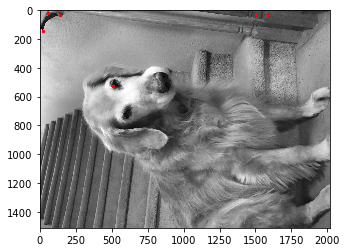

In [5]:
from matplotlib import pyplot as plt
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from PIL import Image

fname = 'Daisy.jpg'
image_1 = Image.open(fname).convert("L")
arr = np.asarray(image_1)
coords_D = corner_peaks(corner_harris(image_1), min_distance = 10)


fig, ax = plt.subplots()
ax.imshow(arr, cmap = plt.cm.gray)
ax.plot(coords_D[:, 1], coords_D[:, 0], '.r', markersize = 5)
plt.show()

In [6]:
coords_D

array([[  20,   55],
       [  32,  143],
       [  32, 1506],
       [  34, 1586],
       [ 140,   20],
       [ 523,  508]])

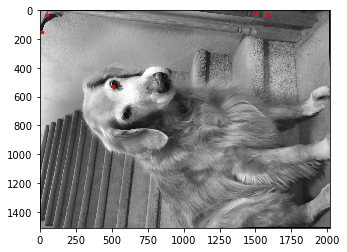

In [7]:
from skimage.transform import rotate

fname = 'Daisy.jpg'
image_2 = Image.open(fname).convert("L")
arr = np.asarray(image_2)
new_pic = rotate(arr, 0.5)
coords_D_3 = corner_peaks(corner_harris(new_pic), min_distance = 10)

fig, ax = plt.subplots()
ax.imshow(new_pic, cmap = plt.cm.gray)
ax.plot(coords_D_3[:, 1], coords_D_3[:, 0], '.r', markersize = 5)
plt.show()

In [13]:
coords_D_3

array([[  28, 1499],
       [  29,   49],
       [  29, 1580],
       [ 148,   15],
       [ 527,  506]])

In [14]:
cost = cdist(coords_D, coords_D_3)
print(cost)

[[ 1444.02216049    10.81665383  1525.02655715   134.10443691
    678.56466162]
 [ 1356.00589969    94.04786016  1437.00313152   172.74258305
    613.83548285]
 [    8.06225775  1457.00308853    74.06078585  1495.50560012
   1115.80688293]
 [   87.20665112  1537.0081327      7.81024968  1575.13078822
   1187.20217318]
 [ 1483.23464091   114.72575997  1563.94405271     9.43398113   621.2608148 ]
 [ 1107.74816633   674.32707198  1180.34740649   619.41423942
      4.47213595]]


In [15]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 2 3 4 5] [1 0 2 3 4]


In [16]:
coords_D_3_new = coords_D_3[col_ind]
print(coords_D_3_new)

[[  29   49]
 [  28 1499]
 [  29 1580]
 [ 148   15]
 [ 527  506]]


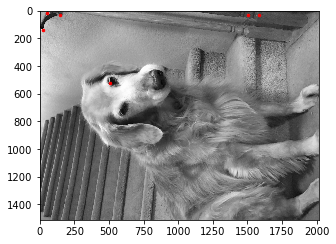

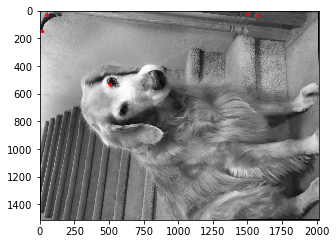

In [17]:
plt.figure(figsize = (5, 5))

plt.imshow(image_1, cmap = plt.cm.gray)
plt.plot(coords_D[:, 1], coords_D[:, 0], '.r', markersize = 5)

plt.figure(figsize = (5, 5))

plt.imshow(new_pic, cmap = plt.cm.gray)
plt.plot(coords_D_3[:, 1], coords_D_3[:, 0], '.r', markersize = 5)
plt.show()

## Hungarian Algorithm Applied to PLoS Predictions 

In [8]:
import pickle

In [9]:
features2 = pickle.load(open("frame2.p", "rb"))
features3 = pickle.load(open("frame3.p", "rb"))

In [10]:
features2

array([[  1.01500000e+03,   5.50000000e+02,   1.00000000e+00],
       [  1.01500000e+03,   4.77000000e+02,   1.00000000e+00],
       [  1.01500000e+03,   4.58000000e+02,   1.00000000e+00],
       ..., 
       [  1.20000000e+01,   4.74000000e+02,   1.00000000e+00],
       [  9.00000000e+00,   9.02000000e+02,   1.00000000e+00],
       [  9.00000000e+00,   5.51000000e+02,   1.00000000e+00]])

In [11]:
features3

array([[  1.00800000e+03,   4.60000000e+02,   1.00000000e+00],
       [  1.00400000e+03,   9.35000000e+02,   1.00000000e+00],
       [  1.00200000e+03,   9.37000000e+02,   1.00000000e+00],
       ..., 
       [  1.10000000e+01,   9.64000000e+02,   1.00000000e+00],
       [  1.00000000e+01,   4.54000000e+02,   1.00000000e+00],
       [  8.00000000e+00,   8.93000000e+02,   1.00000000e+00]])

In [12]:
features2.shape

(1413, 3)

In [13]:
features3.shape

(1948, 3)

In [14]:
1948 - 1413

535

In [15]:
means = np.mean(features2, axis = 0)
print(means)

[ 521.34890304  543.16702052    1.        ]


In [16]:
number0 = means[0]
elements0 = 535

list0 = [number0]*elements0

number1 = means[1]
elements1 = 535

list1 = [number1]*elements1

number2 = means[2]
elements2 = 535

list2 = [number2]*elements2

In [17]:
array0 = np.vstack(np.asarray(list0))
array1 = np.vstack(np.asarray(list1))
array2 = np.vstack(np.asarray(list2))

In [18]:
features2imp = np.hstack((array0, array1, array2))
print(features2imp)

[[ 521.34890304  543.16702052    1.        ]
 [ 521.34890304  543.16702052    1.        ]
 [ 521.34890304  543.16702052    1.        ]
 ..., 
 [ 521.34890304  543.16702052    1.        ]
 [ 521.34890304  543.16702052    1.        ]
 [ 521.34890304  543.16702052    1.        ]]


In [19]:
features2imp.shape

(535, 3)

In [20]:
featuresfinal = np.concatenate((features2, features2imp))
print(featuresfinal)

[[  1.01500000e+03   5.50000000e+02   1.00000000e+00]
 [  1.01500000e+03   4.77000000e+02   1.00000000e+00]
 [  1.01500000e+03   4.58000000e+02   1.00000000e+00]
 ..., 
 [  5.21348903e+02   5.43167021e+02   1.00000000e+00]
 [  5.21348903e+02   5.43167021e+02   1.00000000e+00]
 [  5.21348903e+02   5.43167021e+02   1.00000000e+00]]


In [21]:
featuresfinal.shape

(1948, 3)

In [22]:
featuresfinal.shape == features3.shape

True

In [23]:
im2 = pickle.load(open("im2.p", "rb"))
im3 = pickle.load(open("im3.p", "rb"))

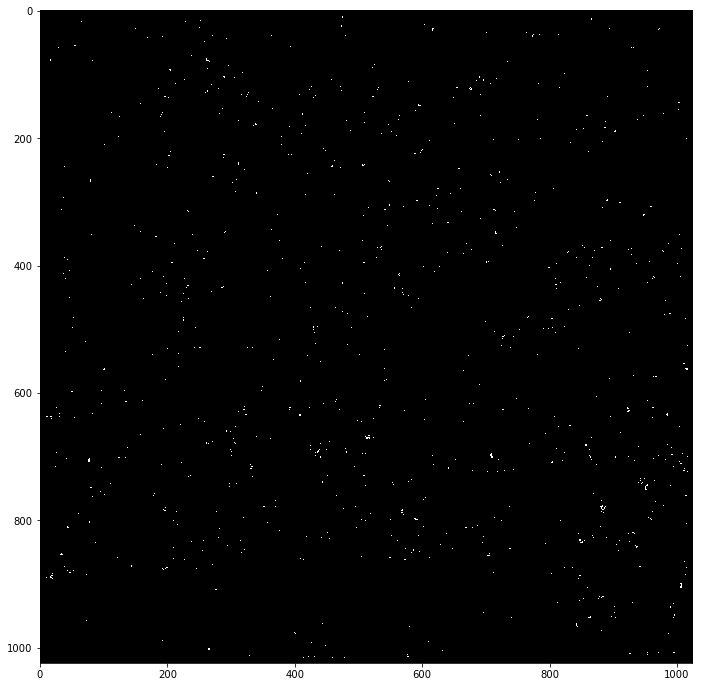

In [24]:
plt.figure(figsize = (20, 12))
plt.imshow(im2, cmap = plt.cm.gray)
plt.show()

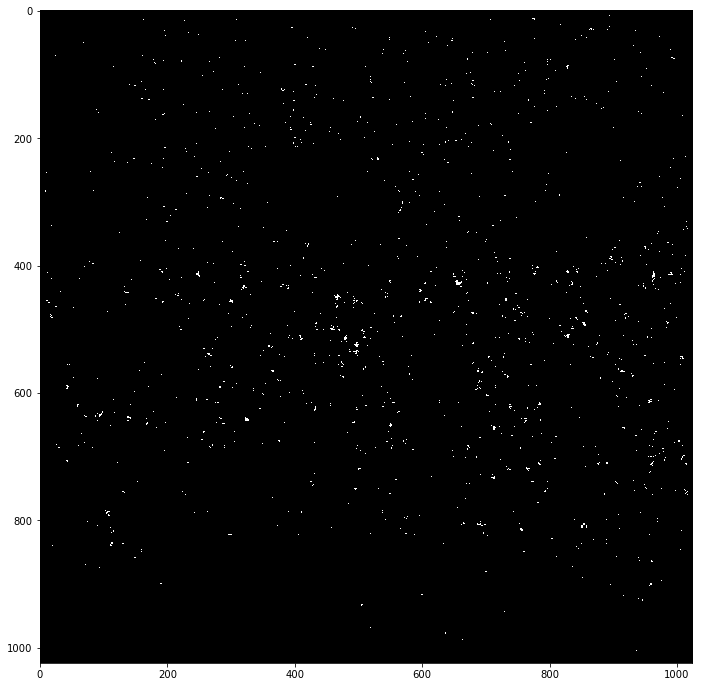

In [25]:
plt.figure(figsize = (20, 12))
plt.imshow(im3, cmap = plt.cm.gray)
plt.show()

In [30]:
from skimage.color import rgb2gray
im2_gray = rgb2gray(im2)

In [31]:
im2_gray.shape

(1024, 1024)

In [70]:
im3_gray = rgb2gray(im3)

In [33]:
im3_gray.shape

(1024, 1024)

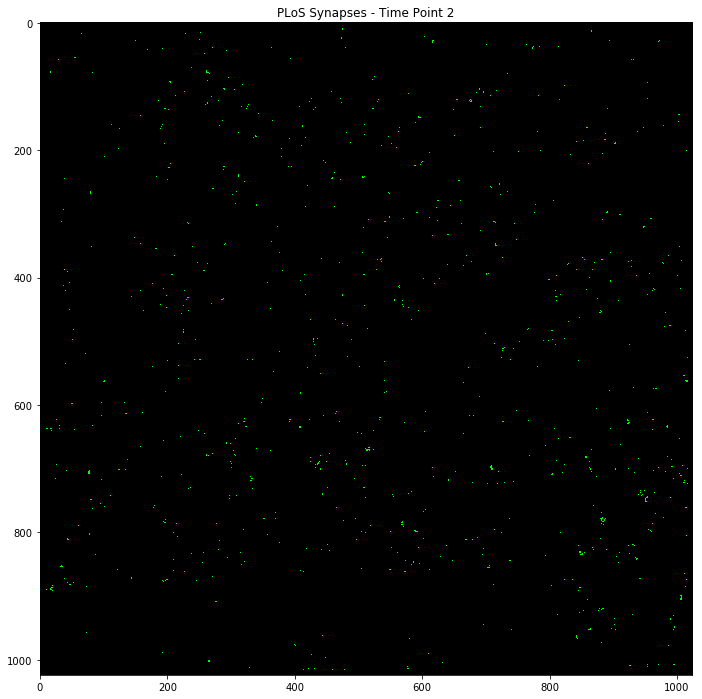

In [182]:
plt.figure(figsize = (20, 12))
im = np.stack([np.zeros(im2_gray.shape), im2_gray, np.zeros(im2_gray.shape)], axis = 2)
plt.title('PLoS Synapses - Time Point 2')
plt.imshow(im)
plt.savefig('im2.png')
plt.show()

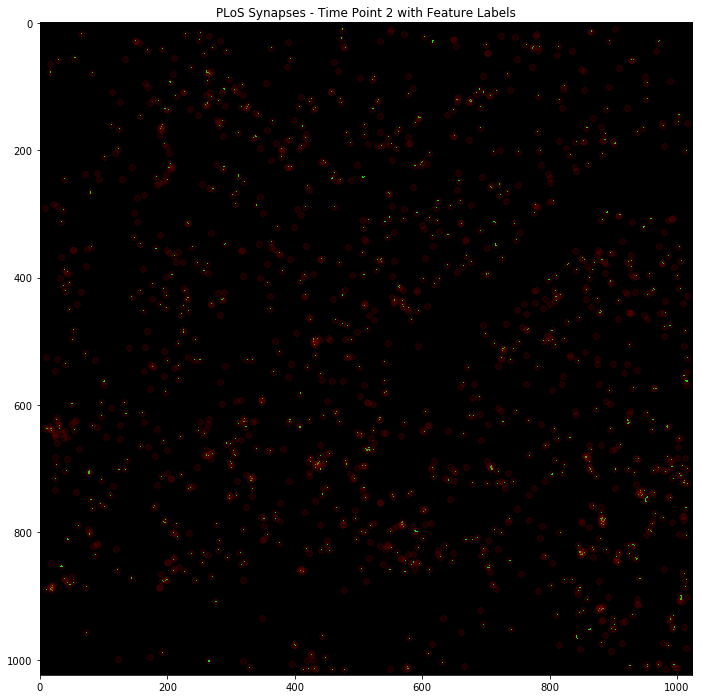

In [206]:
plt.figure(figsize = (20, 12))
im = np.stack([np.zeros(im2_gray.shape), im2_gray, np.zeros(im2_gray.shape)], axis = 2)
plt.title('PLoS Synapses - Time Point 2 with Feature Labels')
plt.scatter(features2[:, 1], features2[:, 0], c = 'r', alpha = 0.1)
plt.imshow(im)
plt.savefig('im2_featurelabels.png')
plt.show()

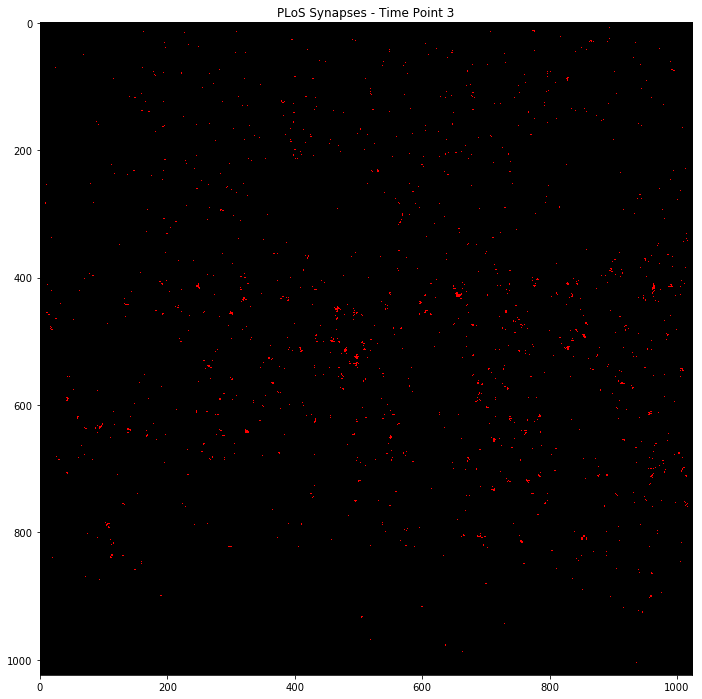

In [199]:
plt.figure(figsize = (20, 12))
im = np.stack([im3_gray, np.zeros(im3_gray.shape), np.zeros(im3_gray.shape)], axis = 2)
plt.title('PLoS Synapses - Time Point 3')
plt.imshow(im)
plt.savefig('im3.png')
plt.show()

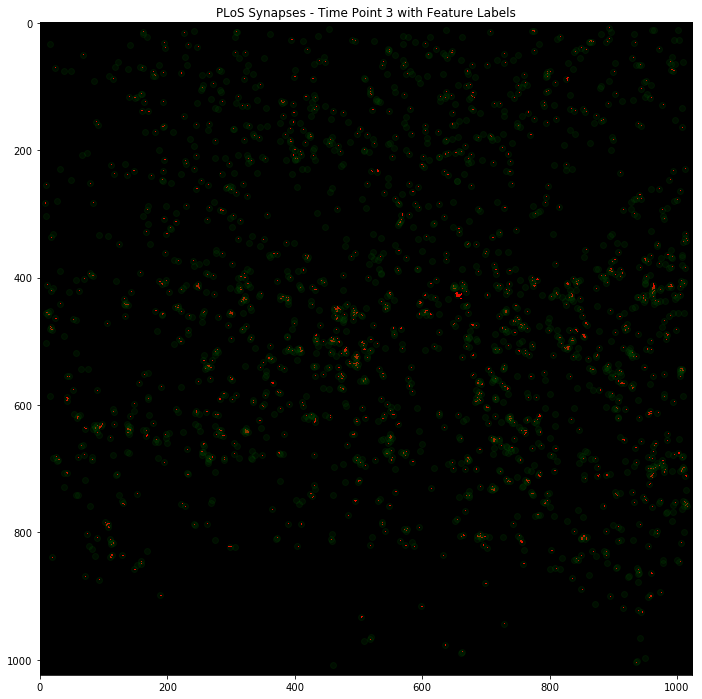

In [204]:
plt.figure(figsize = (20, 12))
im = np.stack([im3_gray, np.zeros(im3_gray.shape), np.zeros(im3_gray.shape)], axis = 2)
plt.title('PLoS Synapses - Time Point 3 with Feature Labels')
plt.scatter(features3[:, 1], features3[:, 0], c = 'g', alpha = 0.1)
plt.imshow(im)
plt.savefig('im3_featurelabels.png')
plt.show()

In [178]:
def overlay_images(img_1, img_2):
    """
    Creates an overlap image using two image volumes.
    """
    assert img_1.shape == img_2.shape, "The two image volumes must have same dimensions."

    mask_img_1 = np.stack([z > 0 for z in img_1])
    mask_img_2 = np.stack([z > 0 for z in img_2])

    rgb_img = np.moveaxis(
        np.stack([mask_img_1, mask_img_2,
                  np.zeros_like(mask_img_1)]), 0, -1)
    rgb_img = rgb_img.astype(float)

    return rgb_img

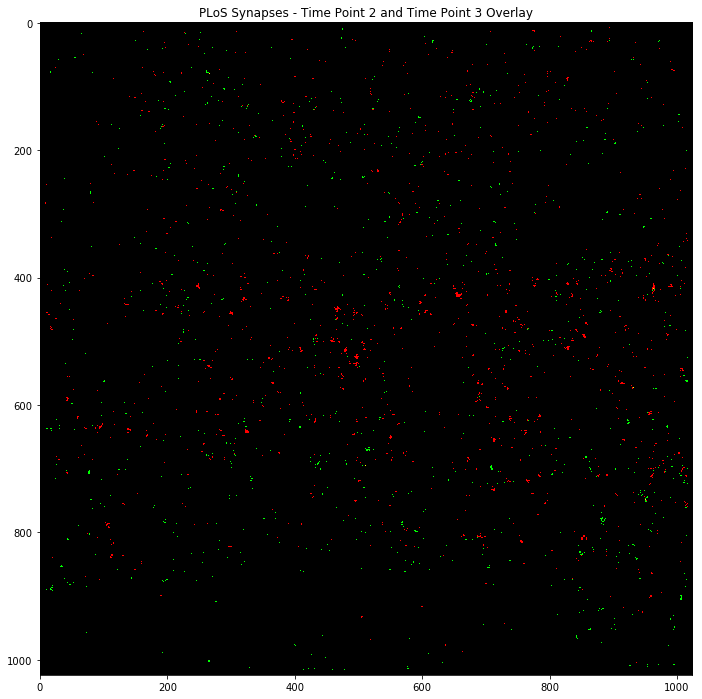

In [191]:
plt.figure(figsize = (20, 12))
plt.imshow(overlay_images(im3, im2))
plt.title('PLoS Synapses - Time Point 2 and Time Point 3 Overlay')
plt.savefig('im2_im3_overlay.png')
plt.show()